In [1]:
import pandas as pd

reg=pd.read_csv('registeration.csv')

edate = reg['Date'].unique()

div = reg['Division'].unique()


//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
result = pd.pivot_table(reg, index =['StudentID','Date'],aggfunc='count')
result = pd.DataFrame(result.to_records())

df = []

for dd in edate:
    d2 = len(result[(result['Date']==dd) & (result['CRN']==2)  ])
    d = len(result[(result['Date']==dd)])
    if(d != 0):
        x = d2/d*100
        df.append([dd,d2,d,x])

df = pd.DataFrame(df,columns=['Date','Two exams','Total','percentage'])  
df.set_index(['Date'],inplace=True)
df.head(9)

,Two exams,Total,percentage
Date,,,
16-Dec-17,771,7198,10.711309
10-Dec-17,1612,10043,16.050981
6-Dec-17,303,5341,5.673095
12-Dec-17,259,4762,5.438891
9-Dec-17,1483,10056,14.747414
14-Dec-17,1072,7769,13.798430
11-Dec-17,435,6442,6.752561
7-Dec-17,491,8167,6.012000
13-Dec-17,256,3952,6.477733


In [9]:
regO['Exam Duration (H:MM)'].unique()

array([datetime.time(2, 0), datetime.time(1, 30), datetime.time(3, 0),
       datetime.time(2, 30), datetime.time(1, 0)], dtype=object)

In [50]:
timeslot.set_index(['slot'], inplace=True)
timeslot.head()

,Day,Date,Start,End
slot,,,,
1,1,NaN,9.0,11.0
10,1,NaN,NaN,NaN
28,1,NaN,1630.0,1830.0
14,2,NaN,NaN,NaN
9,2,NaN,1630.0,1830.0


In [51]:
timeslot.loc[1.0]['Day']

1.0

In [52]:
def findDay(slt):
    return timeslot.loc[slt]['Day']

In [53]:
reg = regO
courses=coursesO

reg['ExamSlot'] = 0
reg['ExamDay'] = 0
courses['ExamSlot'] = 0
courses['ExamDay'] = 0
courses['nstudents'] = 0

for cs in courses.values:
    ns = len(reg[reg["Course"] == cs[0]])
    courses.nstudents[courses.Course == cs[0]] = ns
    

print("---------------Done-------------------")

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


---------------Done-------------------


In [2]:
courses.sort(['nstudents'], ascending=[False], inplace=True)
courses.head()

NameError: name 'courses' is not defined

In [55]:
def MultiExam(cs,day):
    creg = reg[reg["Course"]==cs]
    for cr in creg.values:
        x = len(reg[(reg['ID']==cr[0]) & (reg['ExamDay']==day)])
        if(x>1):
            return 1;
    return 0;

In [56]:
MultiExam('CIS-1103',5)

0

In [57]:


print('I am building the timetable, please wait .... ')


def findConf(course,slot):    
    tempreg = reg[reg['Course'] == course]
    SCourse = pd.merge(tempreg,reg, how='left', on ='ID')
    NConf = len(SCourse[SCourse['ExamSlot_y'] == slot])
    return NConf


def findDayConf(course,day):    
    tempreg = reg[reg['Course'] == course]
    SCourse = pd.merge(tempreg,reg, how='left', on ='ID')
    NConf = len(SCourse[SCourse['ExamDay_y'] == day])
    return NConf

i = 0
for cs in courses.values:  
    for slot in range(1,40):
        found = 0
        if(findConf(cs[0],slot)==0):
           reg.ExamSlot[reg.Course == cs[0]] = slot
           courses.ExamSlot[courses.Course == cs[0]] = slot
           reg.ExamDay[reg.Course == cs[0]] = findDay(slot)
           courses.ExamDay[courses.Course == cs[0]] = findDay(slot)
           i = i + 1
           #print(i, cs[0],slot,findDay(slot))
           found = 1
           break

        if(found==1):
            print(cs[0])
            break

            
      
print("-------")
print("THE END") 



I am building the timetable, please wait .... 


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

-------
THE END


In [69]:
courses['ExamDay'].unique()

array([1, 3, 8, 6, 4, 5, 7, 9, 2])

In [59]:
# Remaining courses 

In [60]:
mr = courses[courses['ExamDay']==0]

len(mr)

0

In [61]:
result = pd.pivot_table(reg, index =['ID','ExamDay'],aggfunc='count')
result = pd.DataFrame(result.to_records())
for x in range(2,5):
    print("Number of multirxam: ",x)
    for day in range(1,9):
        sf = result[(result['College'] == x) & (result['ExamDay']==day)]
        total = result[(result['College'] == 1) & (result['ExamDay']==day)]

        print("Day", day, ":", len(sf), " Total: ",len(total), " %", len(sf)/len(total)*100)

Number of multirxam:  2
Day 1 : 1238  Total:  8245  % 15.01516070345664
Day 2 : 490  Total:  8301  % 5.902903264666907
Day 3 : 273  Total:  6521  % 4.186474467106272
Day 4 : 320  Total:  5136  % 6.230529595015576
Day 5 : 1254  Total:  7974  % 15.726109857035365
Day 6 : 714  Total:  5901  % 12.099644128113878
Day 7 : 866  Total:  5998  % 14.438146048682896
Day 8 : 155  Total:  4946  % 3.133845531742822
Number of multirxam:  3
Day 1 : 0  Total:  8245  % 0.0
Day 2 : 2  Total:  8301  % 0.024093482712926155
Day 3 : 11  Total:  6521  % 0.1686857843888974
Day 4 : 5  Total:  5136  % 0.09735202492211838
Day 5 : 44  Total:  7974  % 0.5517933283170303
Day 6 : 28  Total:  5901  % 0.4744958481613286
Day 7 : 32  Total:  5998  % 0.53351117039013
Day 8 : 10  Total:  4946  % 0.20218358269308534
Number of multirxam:  4
Day 1 : 0  Total:  8245  % 0.0
Day 2 : 0  Total:  8301  % 0.0
Day 3 : 0  Total:  6521  % 0.0
Day 4 : 0  Total:  5136  % 0.0
Day 5 : 0  Total:  7974  % 0.0
Day 6 : 0  Total:  5901  % 0.0
D

In [89]:
cw3 = []

result = pd.pivot_table(reg, index =['ID','ExamDay'],aggfunc='count')
result = pd.DataFrame(result.to_records())

day = 4

x = 3
sf = result[(result['College'] == x) & (result['ExamDay']==day)]

ust = sf['ID'].unique()
for i in range(1,len(ust)-1):
    ucs = reg[(reg['ID']==ust[i]) & (reg['ExamDay'] == day)]['Course'].unique()
    for c in ucs:
        cw3.append(c)
    
cw3 = (list(set(cw3)))

for c in cw3:
    ur = courses[courses['Course']==c]
    print(list(ur['Course']), list(ur['ExamSlot']))

['EGN-4003'] [5]
['LSN-2503'] [15]
['BUS-4663'] [5]
['BUS-4353'] [26]
['EMT-4923'] [26]
['EGN-3333'] [15]


In [86]:

d1 = reg[(reg['ExamDay']==3) & (reg['ExamSlot']==2)]['ID'].unique()
d2 = reg[(reg['ExamDay']==3) & (reg['ExamSlot']==20)]['ID'].unique()
d3 = reg[(reg['ExamDay']==3) & (reg['ExamSlot']==24)]['ID'].unique()

d1=set(d1)
d2=set(d2)
d3=set(d3)


len(d1.intersection(d2.intersection(d3)))

11

In [161]:
def findNewSlot(day,conf):
    cr = set(reg[reg["ExamDay"]==day]['ID'])
    cf = conf.intersection(cr)
    print(len(cf))



def mconf(course,x,day,nday):
    result = pd.pivot_table(reg, index =['ID','ExamDay'],aggfunc='count')
    result = pd.DataFrame(result.to_records())
    print("Number of multirxam: ",x)
    sf = result[(result['College'] == x) & (result['ExamDay']==day)]
    total = result[(result['College'] == 1) & (result['ExamDay']==day)]
    print("Day", day, ":", len(sf), " Total: ",len(total), " %", len(sf)/len(total)*100)
    sf=set(sf["ID"].unique())
    ccourse = set(reg[reg["Course"]==course]['ID'])
    conf = sf.intersection(ccourse)
    if(findNewSlot(nday,conf)==0):
        print("Added")
  
    


In [176]:
mconf("LSN-2503",2,3,2)

Number of multirxam:  2
Day 3 : 273  Total:  6521  % 4.186474467106272
0


6


In [64]:
len(courses)

541

In [65]:
writer = pd.ExcelWriter('FWADraftVersion7Oct.xlsx')
reg.to_excel(writer,'Sheet1')
writer.save()

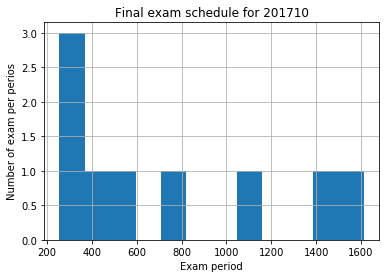

In [17]:
import matplotlib.pyplot as plt


plt.hist(df['Two exams'], bins=12)
plt.xlabel('Exam period')
plt.ylabel('Number of exam per perios')
plt.title('Final exam schedule for 201710')
plt.grid(True)

plt.show()
#courses.examp.plot(kind='hist', bins=30)


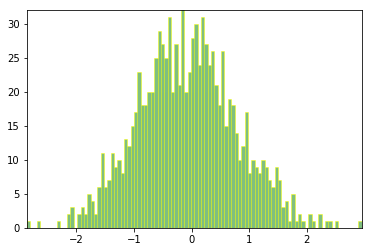

In [67]:

import numpy as np

import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5,0] = left
verts[0::5,1] = bottom
verts[1::5,0] = left
verts[1::5,1] = top
verts[2::5,0] = right
verts[2::5,1] = top
verts[3::5,0] = right
verts[3::5,1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5,1] = top
    verts[2::5,1] = top

ani = animation.FuncAnimation(fig, animate, 100, repeat=False)
plt.show()